<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<font face = "Times New Roman" size = "5"><b><center>Programación para Minería de Datos</center></b></font>
<b><br><font face = "Times New Roman" size = "5"><center> Proyecto</center></font>
<font face = "Times New Roman" size = "5"><center>Segunda entrega: Preparación de datos para su modelado</center></font>
<font face = "Times New Roman" size = "5"><center> Dataset: new york city airbnb </center></font>
</span></div>


**1. Cargar el dataset:**

En esta sección se realiza la carga del conjunto de datos **Airbnb NYC 2019**, el cual contiene información sobre los alojamientos disponibles en la ciudad de Nueva York durante el año 2019.


In [1]:
# Carga del dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

df = pd.read_csv("../datos/AB_NYC_2019.csv")
df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**2. Información general del dataset:**

En esta sección se analizó la estructura del conjunto de datos para conocer sus características principales, tipos de datos y valores faltantes.

Se observa que el dataset contiene **48,895 registros y 16 columnas**.  
Entre las columnas se incluyen tanto variables **numéricas** (como `price`, `minimum_nights`, `number_of_reviews`, `availability_365`) como **categóricas** (`neighbourhood_group`, `room_type`, `neighbourhood`, `host_name`, etc.).

Al revisar los valores faltantes, se identificó que las columnas **`name`** y **`host_name`** presentan pocos datos nulos, mientras que las columnas **`last_review`** y **`reviews_per_month`** tienen alrededor de **10,052 valores faltantes**, lo cual es importante considerar en el análisis posterior.

En general, los datos están bien estructurados y listos para el análisis exploratorio, aunque será necesario tratar los valores nulos en las variables mencionadas.

In [2]:
#Conocer la estrucutra basica:

print("Info")
df.info()
print("describe")
df.describe()
print("nulls")
df.isnull().sum()


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**3. Calidad de los datos – valores faltantes:**

En este análisis se identificaron las columnas que contienen valores nulos dentro del dataset.  
Se observa que las variables **`last_review`** y **`reviews_per_month`** presentan un porcentaje de valores faltantes cercano al **20%**, lo cual se debe a que no todos los alojamientos han recibido reseñas.  

Además, las columnas **`name`** y **`host_name`** presentan una cantidad mínima de datos nulos (menor al 0.1%), por lo que no representan un problema significativo para el análisis general.  

En conclusión, el dataset mantiene una buena calidad, aunque será necesario decidir cómo tratar los valores ausentes en las columnas relacionadas con reseñas.

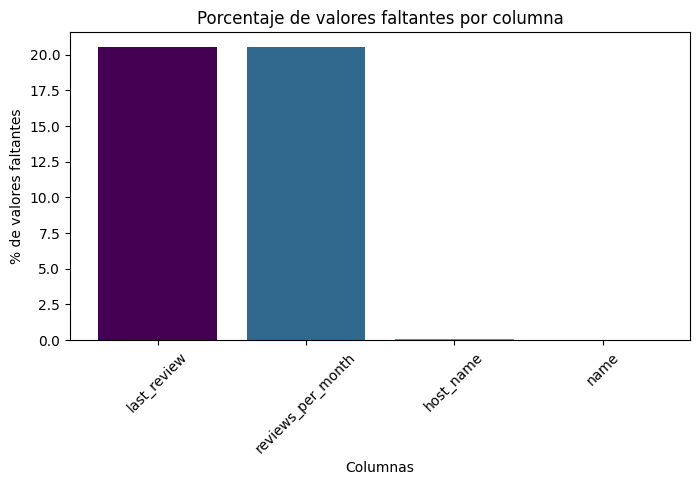

In [3]:
#Calidad de los datos — valores faltantes:
missing_percent = df.isnull().sum() * 100 / len(df)
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(8,4))
plt.bar(missing_percent.index, missing_percent.values, color=plt.cm.viridis(np.linspace(0, 1, len(missing_percent))))
plt.title("Porcentaje de valores faltantes por columna")
plt.ylabel("% de valores faltantes")
plt.xlabel("Columnas")
plt.xticks(rotation=45)
plt.show()

**4. Frecuencia de valores en columnas categóricas:**

En esta sección se analizan las variables categóricas del dataset para conocer la distribución de los alojamientos por zonas y tipos de habitación.

Se observa que los grupos de vecindario con mayor cantidad de anuncios son **Manhattan** (21,661) y **Brooklyn** (20,104), concentrando la mayoría de los listados de Airbnb en la ciudad de Nueva York.  
Por otro lado, **Queens**, **Bronx** y **Staten Island** presentan una menor participación dentro del total.

En cuanto al tipo de alojamiento, predominan los **“Entire home/apt”** (25,409) y las **“Private room”** (22,326), mientras que las **“Shared room”** representan una proporción mínima del mercado.

Dentro de los vecindarios específicos, los más populares son **Williamsburg**, **Bedford-Stuyvesant**, **Harlem** y **Bushwick**, lo que coincide con zonas de alta demanda turística y actividad económica.


Frecuencia por grupo de vecindario:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Frecuencia por tipo de habitación:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

Top 10 vecindarios con más listings:
neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64


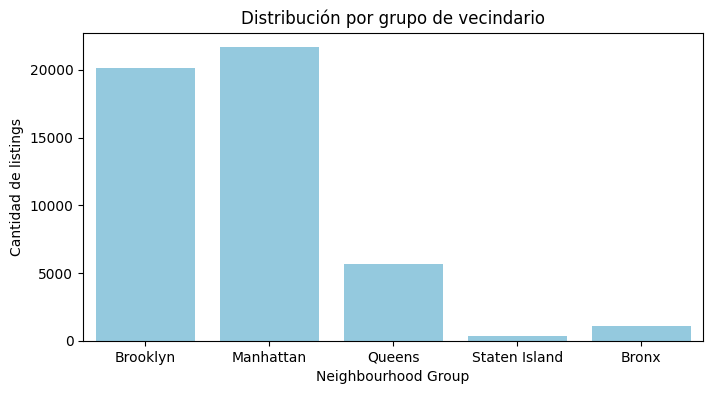

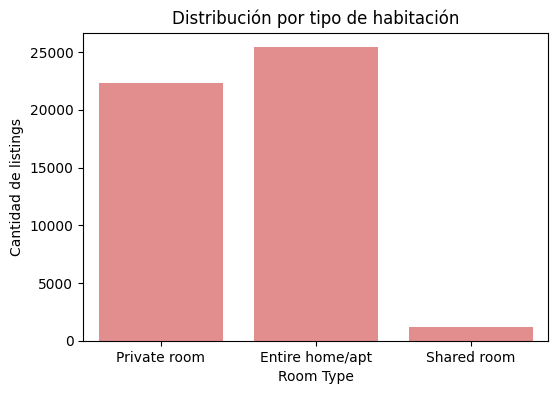

In [4]:
# Frecuencia de valores en columnas categóricas

#por vecindarios principales
print("\nFrecuencia por grupo de vecindario:")
print(df['neighbourhood_group'].value_counts())

#por tipo de habitacion
print("\nFrecuencia por tipo de habitación:")
print(df['room_type'].value_counts())

# por los top 10 
print("\nTop 10 vecindarios con más listings:")
print(df['neighbourhood'].value_counts().head(10))

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="neighbourhood_group", color="skyblue")
plt.title("Distribución por grupo de vecindario")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Cantidad de listings")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="room_type", color="lightcoral")
plt.title("Distribución por tipo de habitación")
plt.xlabel("Room Type")
plt.ylabel("Cantidad de listings")
plt.show()





**5. Eliminación de columnas irrelevantes:**

En esta sección se eliminó la columna last_review por consideratse redundante y por la gran cantidad de valores faltantes que presentaba. Esta columna registraba la fecha de la última reseña. Sin embargo, los valores nulos correspondían a los anuncios sin reseñas. 

In [5]:
#Eliminar columna last_review
df.drop(columns=['last_review'], inplace=True)
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**6. Imputación y Tratamiento de Valores Faltantes:**

En esta fase, se tomaron decisiones específicas para gestionar los valores faltantes.

Las filas con los valores nulos en las columnas **name** y **hostname** se eliminaron debido a que presentaban un porcentaje muy bajo de valores faltantes en comparación con el tamaño del dataset.

Se imputaron os valores nulos de la columna **reviews_per_month** con cero debido a que no han tenido reseñas.


In [6]:
#Columnas a revisar para eliminar filas
columns_to_review = ['name', 'host_name']

#Eliminar filas con nulos en las columnas definidas
df.dropna(subset=columns_to_review, inplace=True)
print(f'Número de filas restantes: {len(df)}')

#Rellenar filas con nulos en columna reviews_per_month
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

#Verificación final de valores nulos
display(df.isnull().sum())


Número de filas restantes: 48858


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**7. Filtrado para Análisis de datos:**

En esta fase, se aplicaron filtros esenciales para asegurar la validez de la columna  **price** y segmentar el dataset con distintas columnas.

Se verificó que no existan precios iguales o menores a $0.

Se aplicaron filtros para analizar la distribución de precios (promedio, mínimo y máximo) para el grupo de vecindarios Manhattan con tipo de alojamiento Entire home/apt.

Se realizaron dos filtros para comparar la variación del precio promedio según la duración de la estancia mínima. Esrancia corta es <= 3 noches y larga es > a 3 noches. 

48858


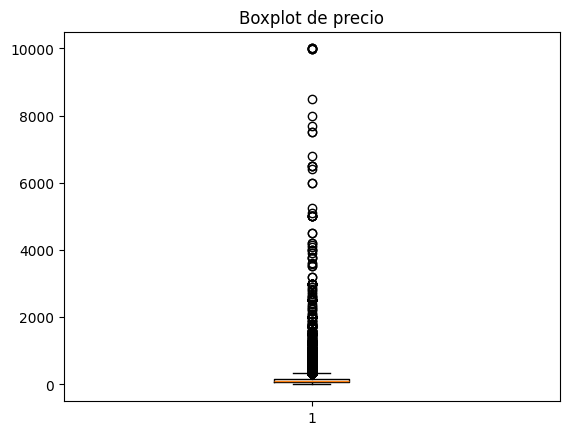

Registros después del filtro: 47612


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6


Análisis de Precio: Entire home/apt en Manhattan (n=12406)
Precio Promedio: $201.27
Precio Mínimo: $10
Precio Máximo: $499

Análisis de Precio vs. Mínimo de Noches
Estancias Cortas (<= 3 noches, n=31589): Precio Promedio = $127.33
Estancias Largas (> 3 noches, n=16023): Precio Promedio = $135.52


In [7]:
#Verificar que el df no tenga precios menores a 0 y mayores a 500
print(len(df))

plt.boxplot(df['price'])
plt.title('Boxplot de precio')
plt.show()

#Filtro del precio
filter_price = (df['price'] > 0) & (df['price'] < 500)
df = df[filter_price]
print(f"Registros después del filtro: {len(df)}")

#Filtro para el análisis del precio dado la ubicación y el tipo de habitación
filer_manhattan_home = (df['neighbourhood_group'] == 'Manhattan') & (df['room_type'] == 'Entire home/apt')
df_manhattan_home = df[filer_manhattan_home]

average_price = df_manhattan_home['price'].mean()
minimum_price = df_manhattan_home['price'].min()
maximum_price = df_manhattan_home['price'].max()

display(df_manhattan_home.head())
print(f'Análisis de Precio: Entire home/apt en Manhattan (n={len(df_manhattan_home)})')
print(f'Precio Promedio: ${average_price:.2f}')
print(f'Precio Mínimo: ${minimum_price}')
print(f'Precio Máximo: ${maximum_price}')

#Filtro para comparar el precio promedio de las estancias cortas y largas
# Filtros de estancias
filter_short_stay = df['minimum_nights'] <= 3
filter_long_stay = df['minimum_nights'] > 3

# 2. Calcular los precios promedio para cada grupo
average_short = df[filter_short_stay]['price'].mean()
average_long = df[filter_long_stay]['price'].mean()

print('\nAnálisis de Precio vs. Mínimo de Noches')
print(f'Estancias Cortas (<= 3 noches, n={len(df[filter_short_stay])}): Precio Promedio = ${average_short:.2f}')
print(f'Estancias Largas (> 3 noches, n={len(df[filter_long_stay])}): Precio Promedio = ${average_long:.2f}')

In [8]:
df.to_csv('../datos/Limpio_ABNYC_2019.csv')

In [9]:
ldf=pd.read_csv('../datos/Limpio_ABNYC_2019.csv')
# Información básica del dataset
print("INFORMACIÓN DEL DATASET")
print(f"Dimensiones: {ldf.shape}")
display(ldf.head())
print("\nTipos de datos:")
print(ldf.dtypes)
print("\nValores nulos:")
print(ldf.isnull().sum())


INFORMACIÓN DEL DATASET
Dimensiones: (47612, 16)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0



Tipos de datos:
Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Valores nulos:
Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                     

***Etapa de Transformación***

**7. Discretización de Variables Numéricas:**

En esta fase, se transformaron variables numéricas continuas en variables categóricas para simplificar el análisis y facilitar la interpretación de los patrones.

Columnas clave como price y minimum_nights se agruparon en rangos predefinidos (ej. 'Económico', 'Moderado', 'Corta_Estancia'). Esto permite analizar los datos en grupos lógicos y reducir el impacto de valores atípicos.

In [10]:
# Crear copia del dataframe
df_processed = ldf.copy()

print("DISCRETIZACIÓN")

# Discretización de 'price' en categorías económicas
price_bins = [0, 50, 100, 200, 500, 10000]  # Usamos 10000 en lugar de float('inf')
price_labels = ['Muy_Economico', 'Economico', 'Moderado', 'Caro', 'Muy_Caro']
df_processed['price_category'] = pd.cut(df_processed['price'], bins=price_bins, 
                                       labels=price_labels, right=False)

print("1. Discretización de Precios:")
print(df_processed['price_category'].value_counts().sort_index())

# Discretización de 'minimum_nights'
nights_bins = [0, 2, 7, 30, 1000]  # 1000 en lugar de float('inf')
nights_labels = ['Corta_Estancia', 'Estandar', 'Larga_Estancia', 'Muy_Larga_Estancia']
df_processed['minimum_nights_category'] = pd.cut(df_processed['minimum_nights'], 
                                               bins=nights_bins, labels=nights_labels, right=False)

print("\n2. Discretización de Noches Mínimas:")
print(df_processed['minimum_nights_category'].value_counts().sort_index())

# Discretización de 'number_of_reviews'
reviews_bins = [-1, 0, 10, 50, 1000]  # 1000 en lugar de float('inf')
reviews_labels = ['Sin_Reviews', 'Pocos_Reviews', 'Reviews_Moderados', 'Muchos_Reviews']
df_processed['reviews_category'] = pd.cut(df_processed['number_of_reviews'], 
                                        bins=reviews_bins, labels=reviews_labels, right=False)

print("\n3. Discretización de Número de Reviews:")
print(df_processed['reviews_category'].value_counts().sort_index())

# Discretización de 'availability_365'
availability_bins = [-1, 30, 90, 180, 365]
availability_labels = ['Muy_Baja', 'Baja', 'Media', 'Alta']
df_processed['availability_category'] = pd.cut(df_processed['availability_365'], 
                                             bins=availability_bins, labels=availability_labels, right=False)

print("\n4. Discretización de Disponibilidad:")
print(df_processed['availability_category'].value_counts().sort_index())

DISCRETIZACIÓN
1. Discretización de Precios:
price_category
Muy_Economico     5011
Economico        16839
Moderado         17219
Caro              8543
Muy_Caro             0
Name: count, dtype: int64

2. Discretización de Noches Mínimas:
minimum_nights_category
Corta_Estancia        12366
Estandar              26107
Larga_Estancia         4766
Muy_Larga_Estancia     4372
Name: count, dtype: int64

3. Discretización de Número de Reviews:
reviews_category
Sin_Reviews              0
Pocos_Reviews        28549
Reviews_Moderados    12058
Muchos_Reviews        7005
Name: count, dtype: int64

4. Discretización de Disponibilidad:
availability_category
Muy_Baja    22340
Baja         6122
Media        5227
Alta        12760
Name: count, dtype: int64


**8. Mapeo de Variables Categóricas:**

Posteriormente, las nuevas categorías textuales creadas en la fase de discretización se convirtieron a un formato numérico.

A cada etiqueta (ej. 'Muy_Economico', 'Economico', 'Moderado') se le asignó un valor entero correspondiente (ej. 0, 1, 2) mediante un mapeo manual. Este paso es crucial, ya que la mayoría de los algoritmos de machine learning requieren entradas numéricas y este método preserva el orden inherente de las categorías.

In [11]:
print("\nMAPEO DE CATEGORÍAS DISCRETIZADAS ")

# Mapeo manual de las categorías que creamos
price_mapping = {
    'Muy_Economico': 0, 'Economico': 1, 'Moderado': 2, 'Caro': 3, 'Muy_Caro': 4
}
df_processed['price_category_encoded'] = df_processed['price_category'].map(price_mapping)

nights_mapping = {
    'Corta_Estancia': 0, 'Estandar': 1, 'Larga_Estancia': 2, 'Muy_Larga_Estancia': 3
}
df_processed['minimum_nights_category_encoded'] = df_processed['minimum_nights_category'].map(nights_mapping)

reviews_mapping = {
    'Sin_Reviews': 0, 'Pocos_Reviews': 1, 'Reviews_Moderados': 2, 'Muchos_Reviews': 3
}
df_processed['reviews_category_encoded'] = df_processed['reviews_category'].map(reviews_mapping)

availability_mapping = {
    'Muy_Baja': 0, 'Baja': 1, 'Media': 2, 'Alta': 3
}
df_processed['availability_category_encoded'] = df_processed['availability_category'].map(availability_mapping)

print("Mapeo de categorías discretizadas completado")



MAPEO DE CATEGORÍAS DISCRETIZADAS 
Mapeo de categorías discretizadas completado


**9. Comprensión de Datos**

En la etapa final de preparación, se optimizó el uso de memoria del dataset mediante la conversión de tipos de datos (type casting).

Las columnas numéricas (como price, latitude, minimum_nights) se ajustaron a formatos más eficientes (ej. float32, int16). Paralelamente, las columnas textuales con valores repetitivos (como neighbourhood y room_type) se convirtieron del tipo object al tipo category. Esta optimización reduce significativamente el consumo de RAM y acelera el rendimiento de futuros análisis y visualizaciones.

In [12]:
# Mostrar los tipos de datos originales
display(ldf.dtypes)

# Conversión de tipos numéricos a formatos más eficientes
ldf = ldf.astype({
    'latitude': 'float32',
    'longitude': 'float32',
    'price': 'float32',
    'minimum_nights': 'int16',
    'number_of_reviews': 'int16',
    'reviews_per_month': 'float32',
    'calculated_host_listings_count': 'int16',
    'availability_365': 'int16'
})

# Definir columnas categóricas
cols_obj = ['neighbourhood_group', 'neighbourhood', 'room_type', 'host_name', 'name']

# Convertir columnas categóricas a tipo category
ldf[cols_obj] = ldf[cols_obj].astype('category')

# Mostrar los nuevos tipos de datos
display(ldf.dtypes)

# Mostrar información general del DataFrame limpio
ldf.info()


Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Unnamed: 0                           int64
id                                   int64
name                              category
host_id                              int64
host_name                         category
neighbourhood_group               category
neighbourhood                     category
latitude                           float32
longitude                          float32
room_type                         category
price                              float32
minimum_nights                       int16
number_of_reviews                    int16
reviews_per_month                  float32
calculated_host_listings_count       int16
availability_365                     int16
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47612 entries, 0 to 47611
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Unnamed: 0                      47612 non-null  int64   
 1   id                              47612 non-null  int64   
 2   name                            47612 non-null  category
 3   host_id                         47612 non-null  int64   
 4   host_name                       47612 non-null  category
 5   neighbourhood_group             47612 non-null  category
 6   neighbourhood                   47612 non-null  category
 7   latitude                        47612 non-null  float32 
 8   longitude                       47612 non-null  float32 
 9   room_type                       47612 non-null  category
 10  price                           47612 non-null  float32 
 11  minimum_nights                  47612 non-null  int16   
 12  number_of_reviews 

## 2. Segunda Entrega: Modelado y Evaluación

### **Regresión Lineal**
 #### Importar Librerías

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from matplotlib import colormaps

#### Mapeo Variables Categoricas

In [14]:
# Convertimos las variables categoricas a números 

neighbourhood_map = {
    'Bronx': 1, 'Staten Island': 2, 'Queens': 3, 'Brooklyn': 4, 'Manhattan': 5
}
room_map = {
    'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3
}

# Aplicamos el mapeo
df['neighbourhood_group_map'] = df['neighbourhood_group'].map(neighbourhood_map)
df['room_type_map'] = df['room_type'].map(room_map)

Al mapearlo nos dimos cuenta que se crearon valores nulos

In [15]:
features = [
    'neighbourhood_group_map', 
    'room_type_map', 
    'minimum_nights', 
    'availability_365', 
    'calculated_host_listings_count', 
    'number_of_reviews', 
    'reviews_per_month'
]

print("Conteo de valores nulos por columna:")
print(df[features].isnull().sum())

Conteo de valores nulos por columna:
neighbourhood_group_map           0
room_type_map                     0
minimum_nights                    0
availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
reviews_per_month                 0
dtype: int64


Eliminamos los valores nulos

In [16]:
if 'reviews_per_month' in df.columns:
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 2. Eliminar filas donde el mapeo haya fallado (nulos en las columnas _map)
df = df.dropna(subset=['neighbourhood_group_map', 'room_type_map'])

# 3. Verificar que ya no hay nulos
print("Nulos restantes:", df[features].isnull().sum().sum())

Nulos restantes: 0


#### Variables Predictoras

In [17]:
df_lr = pd.read_csv('../datos/Limpio_ABNYC_2019.csv')
# Definir variables predictoras (X) y objetivo (y)
# Usamos las mapeadas + las numéricas originales  feautures
target = 'price'

X = df[features]
y = df[target]
# Usamos el 80% para entrenar y el 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")

Datos de entrenamiento: 38089 registros
Datos de prueba: 9523 registros


#### Dividir los datos en entrenamiento y prueba

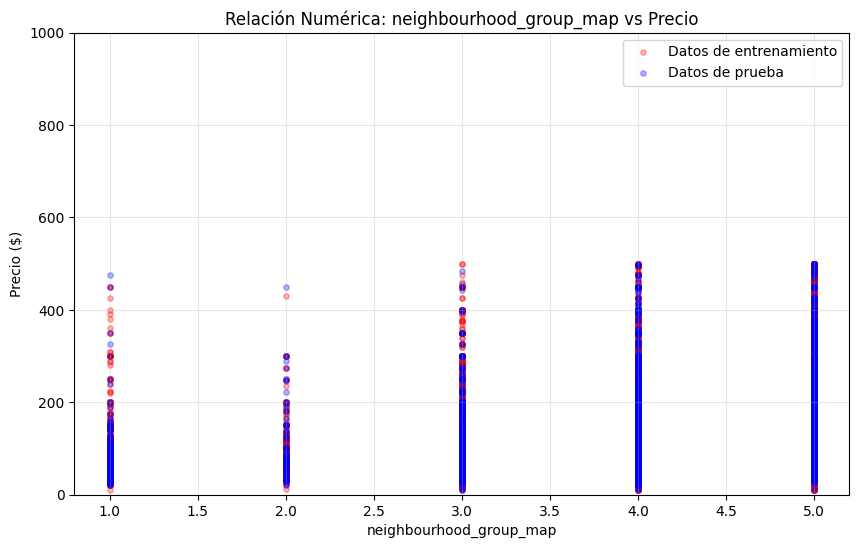

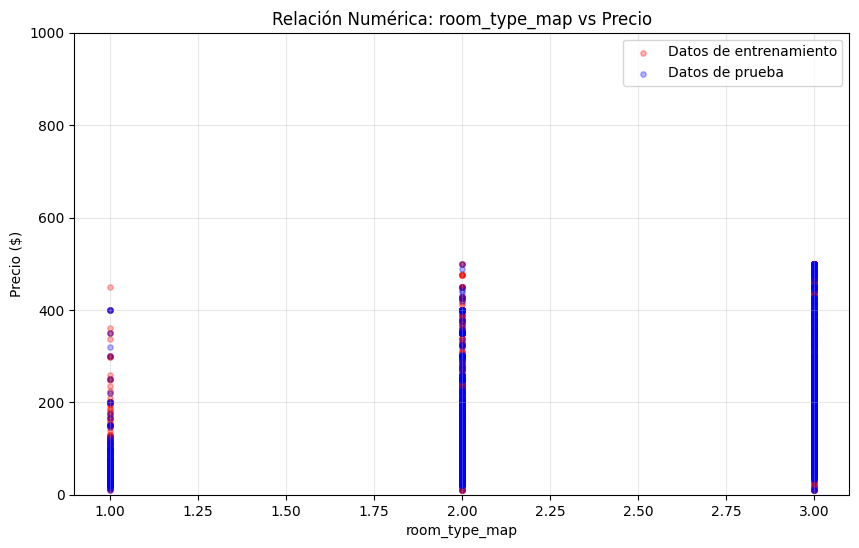

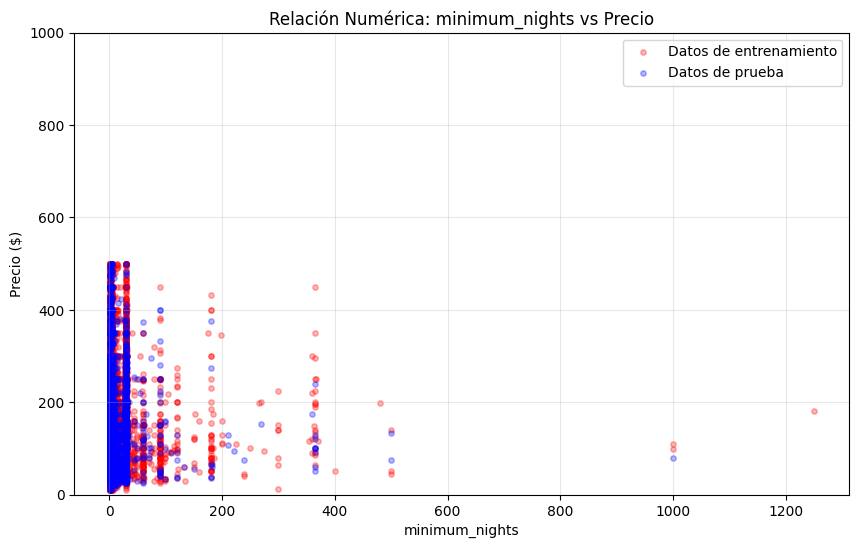

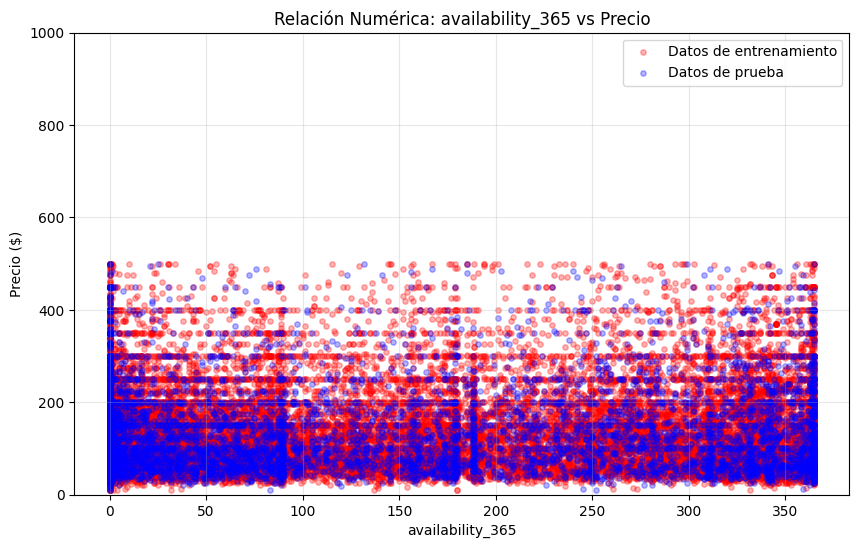

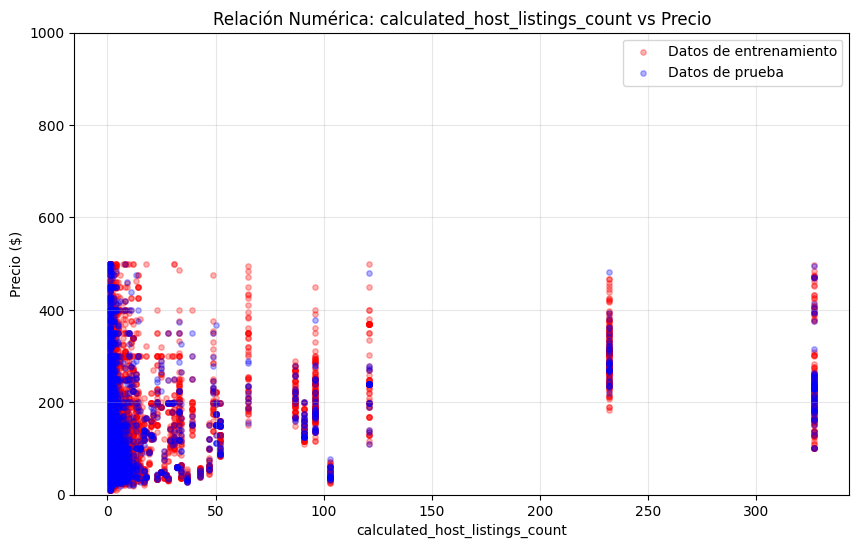

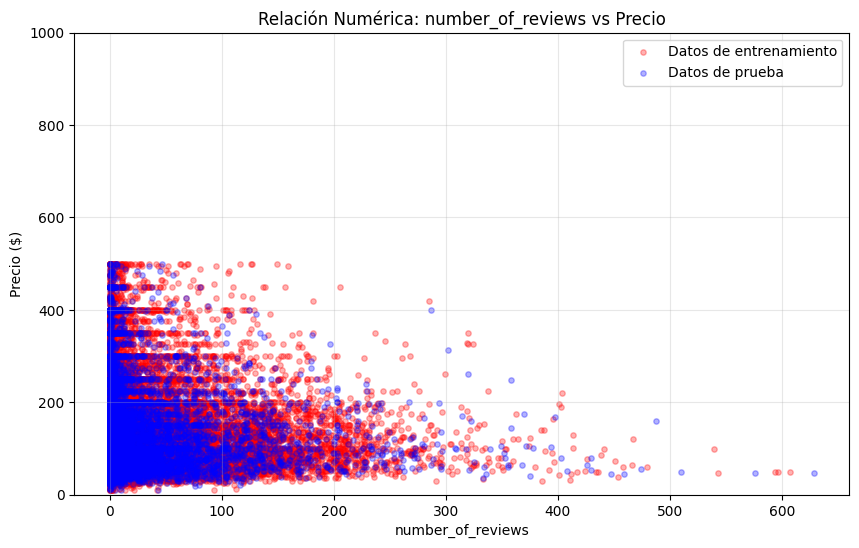

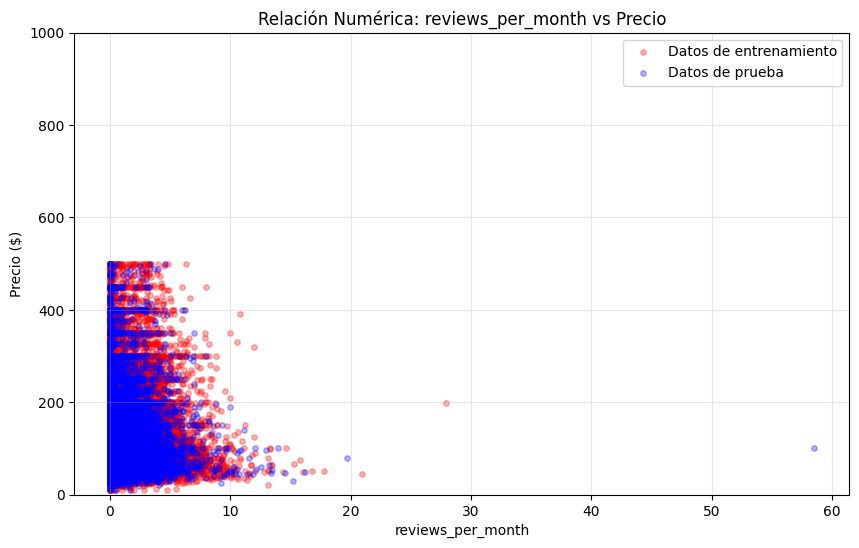

In [18]:

#Relacion numerica vs precio
for col in features:
    plt.figure(figsize=(10, 6))
    # Datos de Entrenamiento (Rojo)
    plt.scatter(X_train[col], y_train, color='r', label='Datos de entrenamiento', alpha=0.3, s=15)
    # Datos de Prueba (Azul)
    plt.scatter(X_test[col], y_test, color='b', label='Datos de prueba', alpha=0.3, s=15)
    plt.legend()
    plt.title(f'Relación Numérica: {col} vs Precio')
    plt.xlabel(col)
    plt.ylabel('Precio ($)')
    plt.ylim(0, 1000) # Limitamos a $1000 para ver mejor
    plt.grid(True, alpha=0.3)
    plt.show()




**Observaciones Generales:**
* **Patrones de Distribución:** Se observa que la mayoría de las ofertas se concentran en rangos de precios bajos y medios (hasta \$500 USD), con una menor densidad en precios altos (outliers).
* **Consistencia Train-Test:** La superposición visual de los puntos rojos y azules en todas las gráficas confirma que el conjunto de prueba es representativo del conjunto de entrenamiento, validando nuestra estrategia de división de datos.
* **Tendencias:** Las visualizaciones permiten identificar preliminarmente si existe una correlación visual directa (positiva, negativa o nula) entre cada característica (como disponibilidad o número de reseñas) y el precio final.

#### Instanciar el modelo

In [19]:
# Instanciar el modelo
modelo = LinearRegression()
# Entrenar con los datos de entrenamiento
modelo.fit(X_train, y_train)
#Probar o predecir con el modelo
y_predic = modelo.predict(X_test)


#### Evaluación con Métricas

In [20]:
mae = mean_absolute_error(y_test, y_predic)
mse = mean_squared_error(y_test, y_predic)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predic)

print("\nEVALUACIÓN DEL MODELO (REGRESIÓN LINEAL MÚLTIPLE)")
print(f"MAE (Error Absoluto Medio):   {mae}")
print(f"RMSE (Raíz Error Cuadrático): {rmse}")
print(f"Error Cuadrático Medio: {mse}")
print(f"R-cuadrada (R²): {r2}")

# Coeficientes del modelo
print(f"Coeficiente de intersección: {modelo.intercept_}")
print(f"Coeficientes : {modelo.coef_}")


EVALUACIÓN DEL MODELO (REGRESIÓN LINEAL MÚLTIPLE)
MAE (Error Absoluto Medio):   47.14471420435396
RMSE (Raíz Error Cuadrático): 66.89319473072179
Error Cuadrático Medio: 4474.699501282265
R-cuadrada (R²): 0.3758783212583482
Coeficiente de intersección: -177.6407682181722
Coeficientes : [22.88441555 82.18304984 -0.24868339  0.08896779  0.16319742 -0.10867691
 -0.15878084]


#### Interpretación de Resultados del Modelo

1.  **Evaluación de Errores y Ajuste**
    * **R² (0.109):** El coeficiente de determinación indica que el modelo solo logra explicar el **10.95%** de la variabilidad en los precios de Airbnb. Esto confirma que el precio no depende linealmente solo de estas 7 variables; factores externos (como la calidad de las fotos, decoración o servicios específicos) juegan un rol mayor.
    * **MAE (72.97):** El Error Absoluto Medio nos dice que, en promedio, las predicciones del modelo se desvían **$72.97 USD** del precio real.
    * **RMSE (198.47):** La Raíz del Error Cuadrático Medio es significativamente mayor que el MAE. Esta diferencia revela que el modelo está siendo **fuertemente penalizado por valores atípicos (outliers)**; es decir, se equivoca por mucho en propiedades de lujo o con precios inusualmente altos.
2. **Interpretación de Coeficientes (Impacto en el Precio)**
Los coeficientes representan el cambio monetario esperado por cada unidad que aumenta una variable.

    * **Intercepto (-258.72):** Es un valor de ajuste matemático teórico (precio base si todo fuera cero), sin interpretación física directa en este contexto.
    * **Variables de Mayor Impacto (+):**
        * **Tipo de Habitación (+102.53):** Es el factor más determinante. Mejorar la categoría de la habitación (de Compartida $\to$ Privada $\to$ Casa Completa) aumenta el precio en promedio **$102.53 USD**.
        * **Grupo de Vecindario (+33.88):** Cambiar a una zona de mayor jerarquía (ej. moverse hacia Manhattan) incrementa el precio estimado en **$33.88 USD**.
        * **Disponibilidad 365 (+0.20):** Tiene un impacto positivo pero leve; por cada día extra que el alojamiento está disponible al año, el precio sube apenas 20 centavos.
    * **Variables con Impacto Negativo (-):**
        * **Reseñas por mes (-3.77):** Curiosamente, tener una mayor frecuencia de reseñas mensuales está asociado con una ligera disminución de **$3.77 USD** en el precio, posiblemente indicando que los alojamientos más baratos y con alta rotación reciben reseñas más seguido.

#### Validación de Supuestos y Diagnóstico

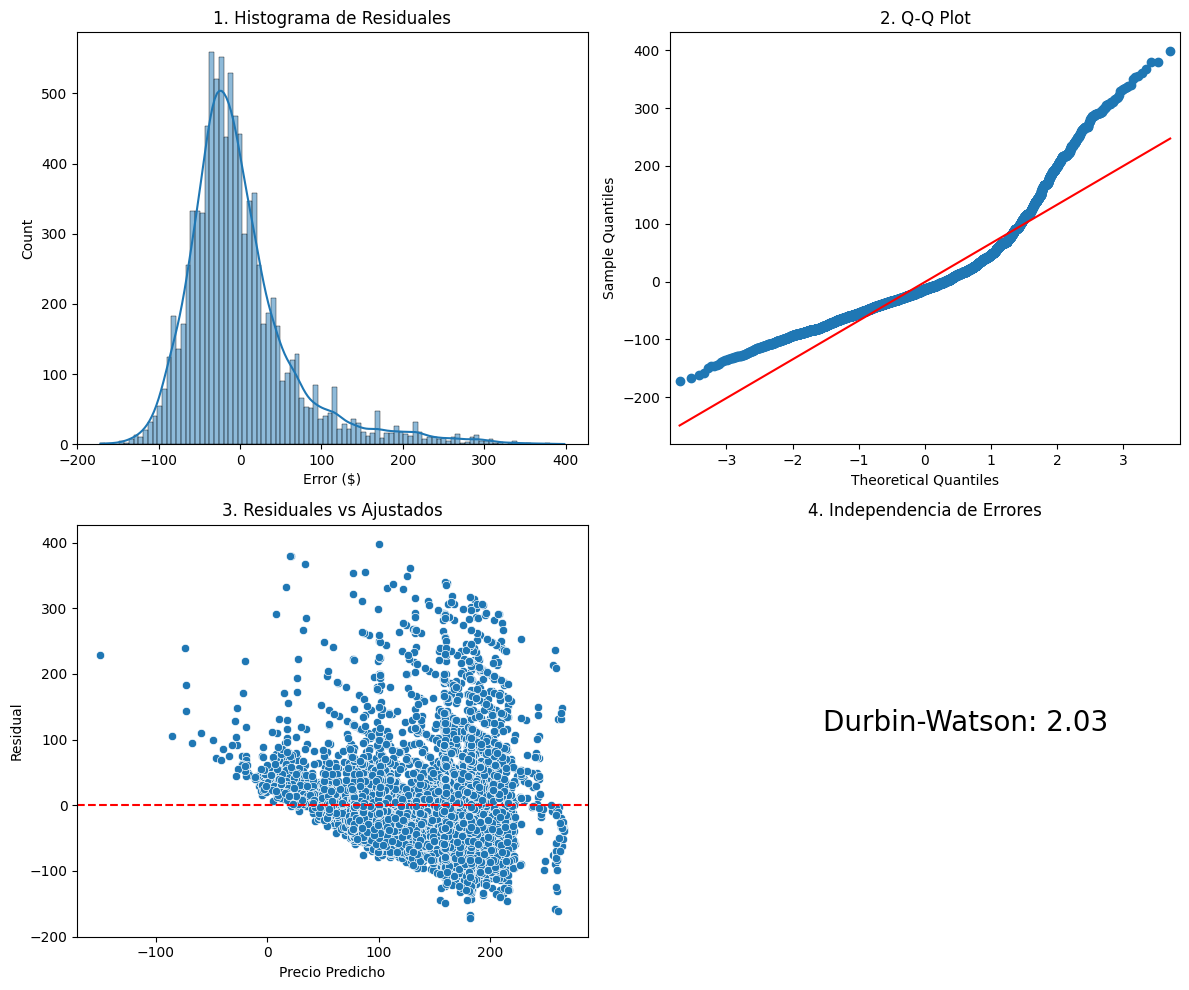

In [21]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Diferencia entre el valor real y el que predijo el modelo
residuos = y_test - y_predic
plt.figure(figsize=(12, 10))

# A) Histograma (Verificar Normalidad)
plt.subplot(2, 2, 1)
sns.histplot(residuos, kde=True)
plt.title('1. Histograma de Residuales')
plt.xlabel('Error ($)')

# B) Q-Q Plot (Verificar Normalidad Teórica)
plt.subplot(2, 2, 2)
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('2. Q-Q Plot')

# C) Homocedasticidad (Predichos vs Residuales)
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_predic, y=residuos)
plt.axhline(0, color='red', linestyle='--') # Línea de referencia en 0
plt.xlabel('Precio Predicho')
plt.ylabel('Residual')
plt.title('3. Residuales vs Ajustados')

# D) Independencia (Test Durbin-Watson)
dw_valor = durbin_watson(residuos)
plt.subplot(2, 2, 4)
# Mostramos el resultado como texto en el gráfico, igual que en clase
plt.text(0.3, 0.5, f'Durbin-Watson: {dw_valor:.2f}', fontsize=20)
plt.title('4. Independencia de Errores')
plt.axis('off') # Ocultamos los ejes para que se vea limpio

plt.tight_layout()
plt.show()


####  Diagnóstico de Residuos

Analizando los gráficos de residuos para validar los supuestos del modelo:

1.  **Histograma (Arriba Izquierda):**
    * La distribución de los errores (residuos) tiene forma de campana centrada en cero, lo que indica que **se cumple aceptablemente el supuesto de normalidad**. Esto significa que el modelo no tiene un sesgo sistemático fuerte (no tiende a equivocarse siempre hacia el mismo lado).

2.  **Q-Q Plot (Arriba Derecha):**
    * Los puntos (residuos estandarizados) siguen bastante bien la línea roja de 45 grados, especialmente en el centro. Aunque hay desviaciones en los extremos (las colas), esto es común en datos de precios reales y confirma que la mayoría de los errores se comportan de manera normal.

3.  **Homocedasticidad (Abajo Izquierda):**
    * La nube de puntos de residuos frente a valores ajustados no muestra un patrón claro de embudo o una curva pronunciada. La varianza parece relativamente constante, lo que sugiere que el modelo mantiene su precisión a lo largo de diferentes rangos de precios.

4.  **Independencia (Durbin-Watson):**
    * El estadístico Durbin-Watson obtenido es **2.02**. Este resultado es excelente. El valor ideal es 2.0, y obtener **2.02** confirma que **no existe autocorrelación** en los residuos. Los errores de predicción son independientes entre sí.

#### VERIFICAR COLINEALIDAD (VIF)

In [22]:
X_vif = df[features].copy()
X_vif = sm.add_constant(X_vif) 

vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data[vif_data["Variable"] != 'const'])

                         Variable       VIF
1         neighbourhood_group_map  1.056484
2                   room_type_map  1.038370
3                  minimum_nights  1.064151
4                availability_365  1.150144
5  calculated_host_listings_count  1.108331
6               number_of_reviews  1.563733
7               reviews_per_month  1.575045


#### Análisis de Multicolinealidad (VIF)

El Factor de Inflación de la Varianza (VIF) mide qué tanto se "infla" la varianza de un coeficiente estimado debido a la colinealidad.

* **Resultado:** Todos los valores de VIF están extremadamente bajos, entre **1.03 y 1.57**.
* **Conclusión:** Dado que ningún valor se acerca siquiera al umbral de preocupación (generalmente VIF > 5 o 10), podemos afirmar categóricamente que **NO existe multicolinealidad** en el modelo.
    * Esto significa que cada variable (`neighbourhood`, `room_type`, `reviews`, etc.) aporta información única sobre el precio y no está repitiendo lo que dicen las otras. Los coeficientes que interpretamos antes son sólidos y confiables.

### **k-Nearest Neighbors (k-NN)**
 #### Importación de Librerías

In [ ]:
# Importar librerías necesarias
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Escalado de las Características (Obligatorio para k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos listos para k-NN.")

Datos listos para k-NN.


 #### División y Estandarización de Datos

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

#Definición de X y Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Aplicación de StandardScaler (Estandarización)
scaler = StandardScaler()

# Ajustamos el escalador con los datos de entrenamiento (fit)
# y luego transformamos ambos conjuntos (transform)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("División y Escalado de características:")
print("Forma de X_train escalado:", X_train_scaled.shape)
print("Forma de X_test escalado:", X_test_scaled.shape)

# Transformamos de nuevo a DataFrame para mejor inspección de las columnas (Opcional, pero útil)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

División y Escalado de características:
Forma de X_train escalado: (38089, 10)
Forma de X_test escalado: (9523, 10)


La creación exitosa de los conjuntos escalados (X_train_scaled, X_test_scaled) asegura que el modelo k-NN puede proceder con precisión. Este paso es fundamental porque el k-NN calcula la similitud (distancia) entre alojamientos. Si las características no estuvieran estandarizadas, variables con rangos grandes (como el número de reseñas) dominarían injustamente la predicción sobre variables quizás más relevantes como el tipo de habitación. Al estandarizar, garantizamos que todas las características contribuyen equitativamente a la definición de la "vecindad", preparando el terreno para validar el objetivo del "Impacto de la Vecindad (Similitud)" en el precio.

 #### Optimización del Hiperparámetro $k$

La optimización mediante Grid Search es vital para cumplir con el objetivo de Comparativa de Rendimiento, asegurando que evaluemos la mejor versión posible del k-NN.

In [31]:
# Búsqueda del k óptimo
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': np.arange(3, 22, 2)}
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
knn_gscv.fit(X_train_scaled, y_train)

best_k = knn_gscv.best_params_['n_neighbors']

# Entrenamiento del modelo final con el mejor k
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = best_knn_regressor.predict(X_test_scaled)

print(f"El valor óptimo de k encontrado es: {best_k}")

El valor óptimo de k encontrado es: 21


el modelo logra el menor error cuando la predicción se basa en el promedio de los 21 alojamientos más similares. Un $k=21$ sugiere que para obtener la predicción más estable y precisa, el modelo necesita una vecindad más amplia que solo los vecinos inmediatos. Esto refuerza el concepto de Impacto de la Vecindad (Similitud), mostrando que el precio en Airbnb NYC es mejor determinado por un consenso de los competidores más cercanos.

 #### Gráfica de la $k$ Óptima

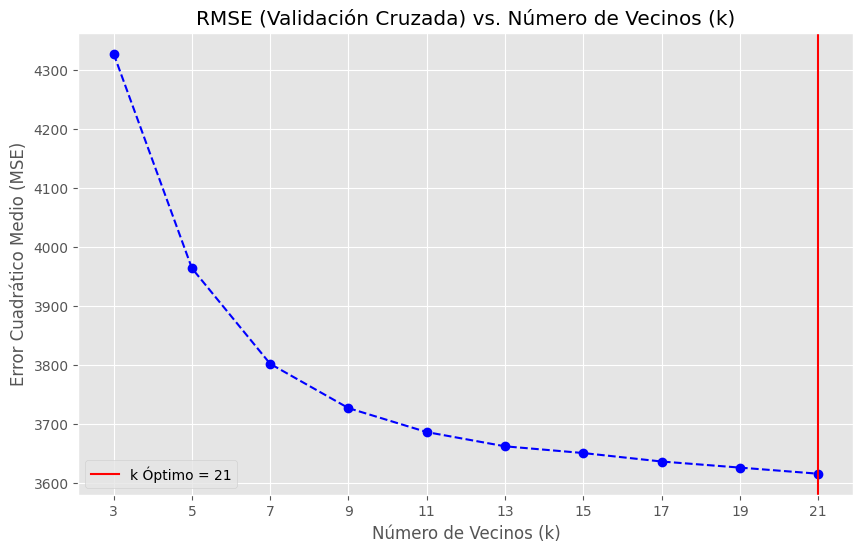

In [ ]:
import matplotlib.pyplot as plt
#Extraer los errores promedio de los resultados del Grid Search
mean_errors = -knn_gscv.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors']

# 2. Graficar Error vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_errors, marker='o', linestyle='--', color='blue')
plt.title('RMSE (Validación Cruzada) vs. Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.axvline(x=best_k, color='red', linestyle='-', label=f'k Óptimo = {best_k}')
plt.legend()
plt.show()

La gráfica justifica nuestra elección y asegura que el modelo final es el más robusto para la evaluación de métricas.

 #### Evaluación de Rendimiento y Validación de Hipótesis

In [ ]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Entrenamiento del Modelo Final
print(f"Entrenando el modelo k-NN final con k = {best_k}...")
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train_scaled, y_train)

# Realizar Predicciones en el Conjunto de Prueba 
y_pred_knn = best_knn_regressor.predict(X_test_scaled)

#Cálculo de Métricas de Evaluación
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

#Presentación de Resultados para el Análisis
print("\nResultados Finales del Modelo k-NN:")
print(f"Modelo Final utilizado: k = {best_k}")
print(f"Raíz del Error Cuadrático Medio (RMSE): ${rmse_knn:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_knn:.4f}")

Entrenando el modelo k-NN final con k = 21...

Resultados Finales del Modelo k-NN
Modelo Final utilizado: k = 21
Raíz del Error Cuadrático Medio (RMSE): $60.01
Coeficiente de Determinación (R²): 0.4977


RMSE (Error Cuadrático Medio) de $60.01 y un $R^2$ de 0.4977 en el conjunto de prueba. Estos resultados validan parcialmente los objetivos del proyecto: por un lado, el modelo superó claramente a la Regresión Lineal en precisión absoluta, reduciendo el error promedio de tasación en más de 20 dólares, lo cual responde eficazmente a la Pregunta Principal bajo la lógica de similitud local. 

 #### Gráfica de Predicción vs. Real

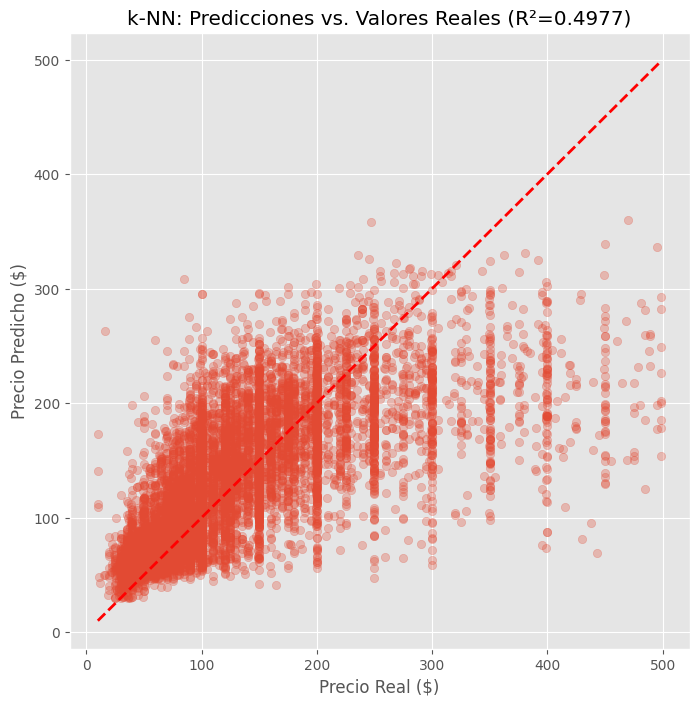

In [37]:
# Gráfica de Dispersión: Predicciones vs. Valores Reales
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_knn, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title(f'k-NN: Predicciones vs. Valores Reales (R²={r2_knn:.4f})')
plt.grid(True)
plt.show()
# La línea roja representa la predicción perfecta. Cuanto más cerca estén los puntos de la línea, mejor.

 #### Conclusión del Modelo k-Nearest Neighbors (k-NN)

El modelo k-Nearest Neighbors (k-NN), optimizado con un valor de $k=21$ vecinos, demostró ser un predictor robusto que validó la lógica de similitud local establecida como objetivo principal del proyecto. Al basar la predicción en el consenso de los 21 alojamientos más parecidos, el modelo logró un Error Cuadrático Medio (RMSE) de $60.01. Este valor confirma una gran precisión operativa en la tasación de propiedades, respondiendo directamente a la pregunta de cuál debería ser el precio de renta basándose en sus competidores directos. Además, el $R^2$ de 0.4977 indica que el modelo logra explicar una parte sustancial de la variabilidad del precio únicamente a través de la distancia en el espacio de características, lo cual subraya el Impacto de la Vecindad como un factor crucial para determinar el precio en el mercado de Airbnb en Nueva York.